In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Data Preparation

In [2]:
data = pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
data.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [5]:
mean = data['oldpeak'].mean()

In [6]:
data = data.fillna(mean)

In [7]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [8]:
data['fbs'] = data['fbs'].astype(int)

In [9]:
data.describe()

,age,trestbps,chol,fbs,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,0.203744,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,0.403003,26.804929,1.055826,1.144436
min,29.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,0.000000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,0.000000,138.000000,0.800000,1.000000
75%,60.000000,144.000000,270.000000,0.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,4.000000


In [10]:
data['num'].unique()

array([0, 1, 2, 3, 4])

In [11]:
numerical_cols = [fe for fe in data.columns if data[fe].dtype not in ['object','bool']]

In [18]:
categorical_cols = [fe for fe in data.columns if data[fe].dtype in ['object','bool']]

In [14]:
numerical_cols

['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num']

In [19]:
categorical_cols

['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

In [20]:
data['exang'].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [21]:
data['exang'] = data['exang'].replace('TURE',True)
data['exang'] = data['exang'].replace('FALSE',False)

In [22]:
data['exang'].unique()

array([False,  True])

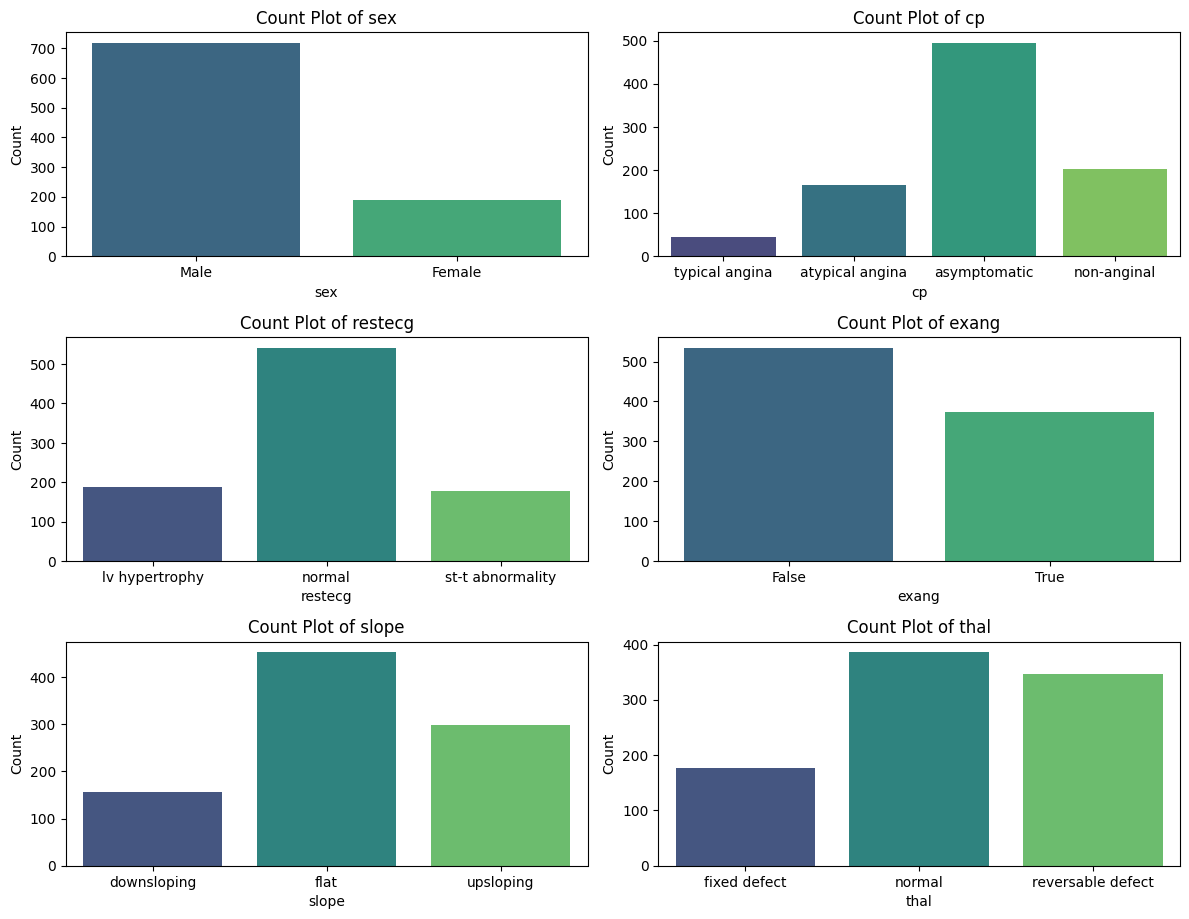

In [25]:
plt.figure(figsize=(12,len(categorical_cols)*3))
for i,fe in enumerate(categorical_cols,1):
    plt.subplot(len(categorical_cols),2,i)
    sn.countplot(data=data, x=fe, palette='viridis')
    plt.title(f'Count Plot of {fe}')
    plt.xlabel(fe)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

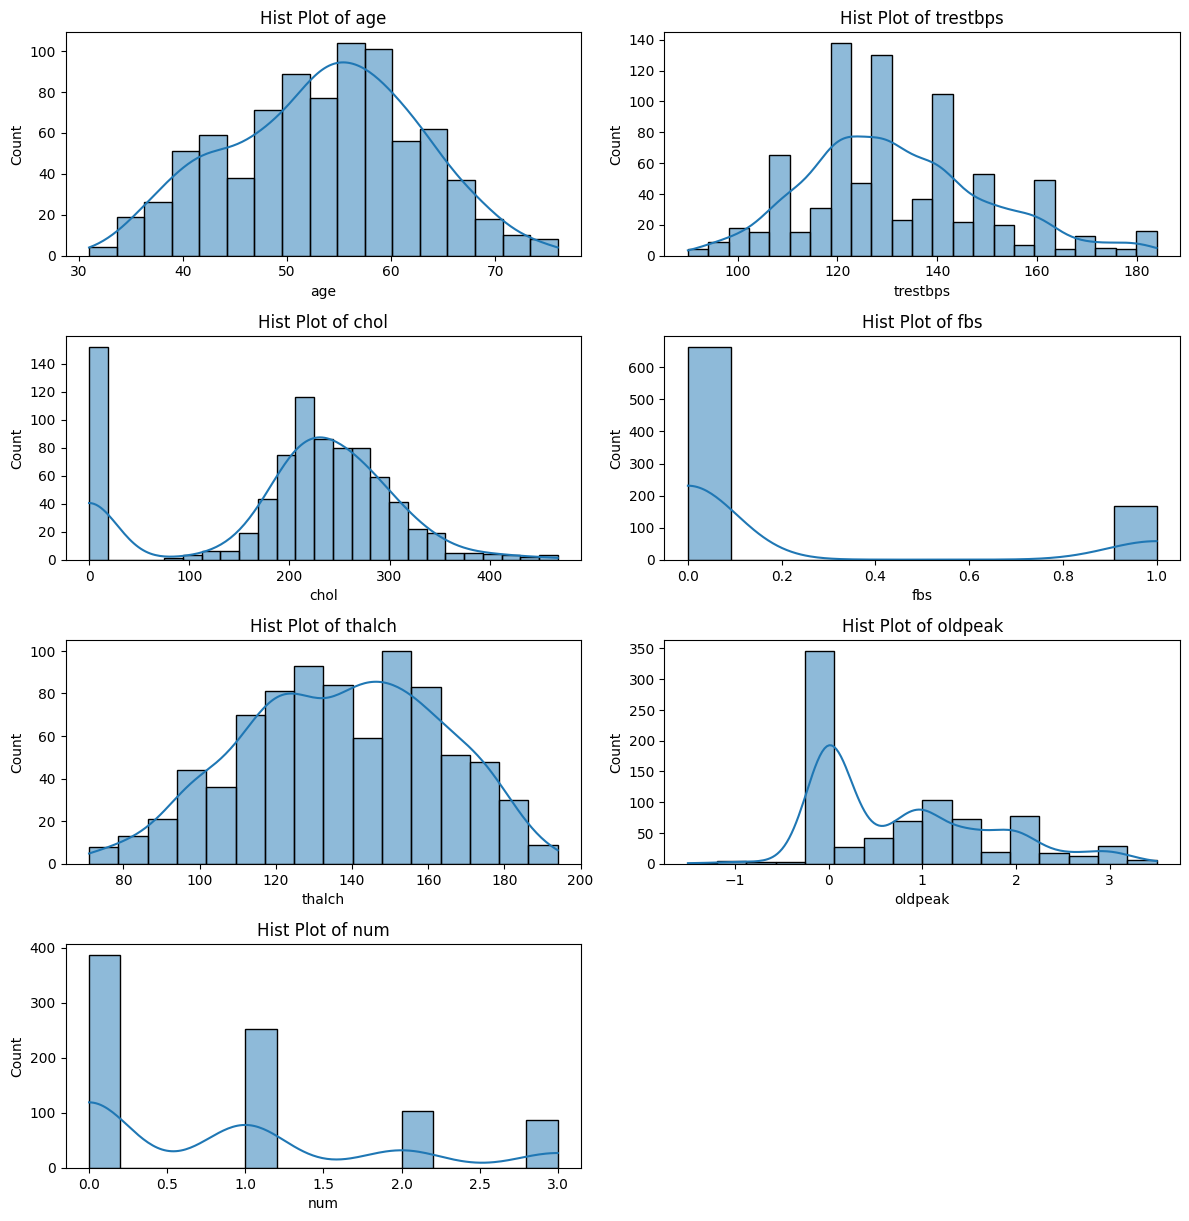

In [31]:
plt.figure(figsize=(12,len(numerical_cols)*3))
for i,fe in enumerate(numerical_cols,1):
    plt.subplot(len(numerical_cols),2,i)
    sn.histplot(data=data, x=fe, kde=True, palette='viridis')
    plt.title(f'Hist Plot of {fe}')
    plt.xlabel(fe)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

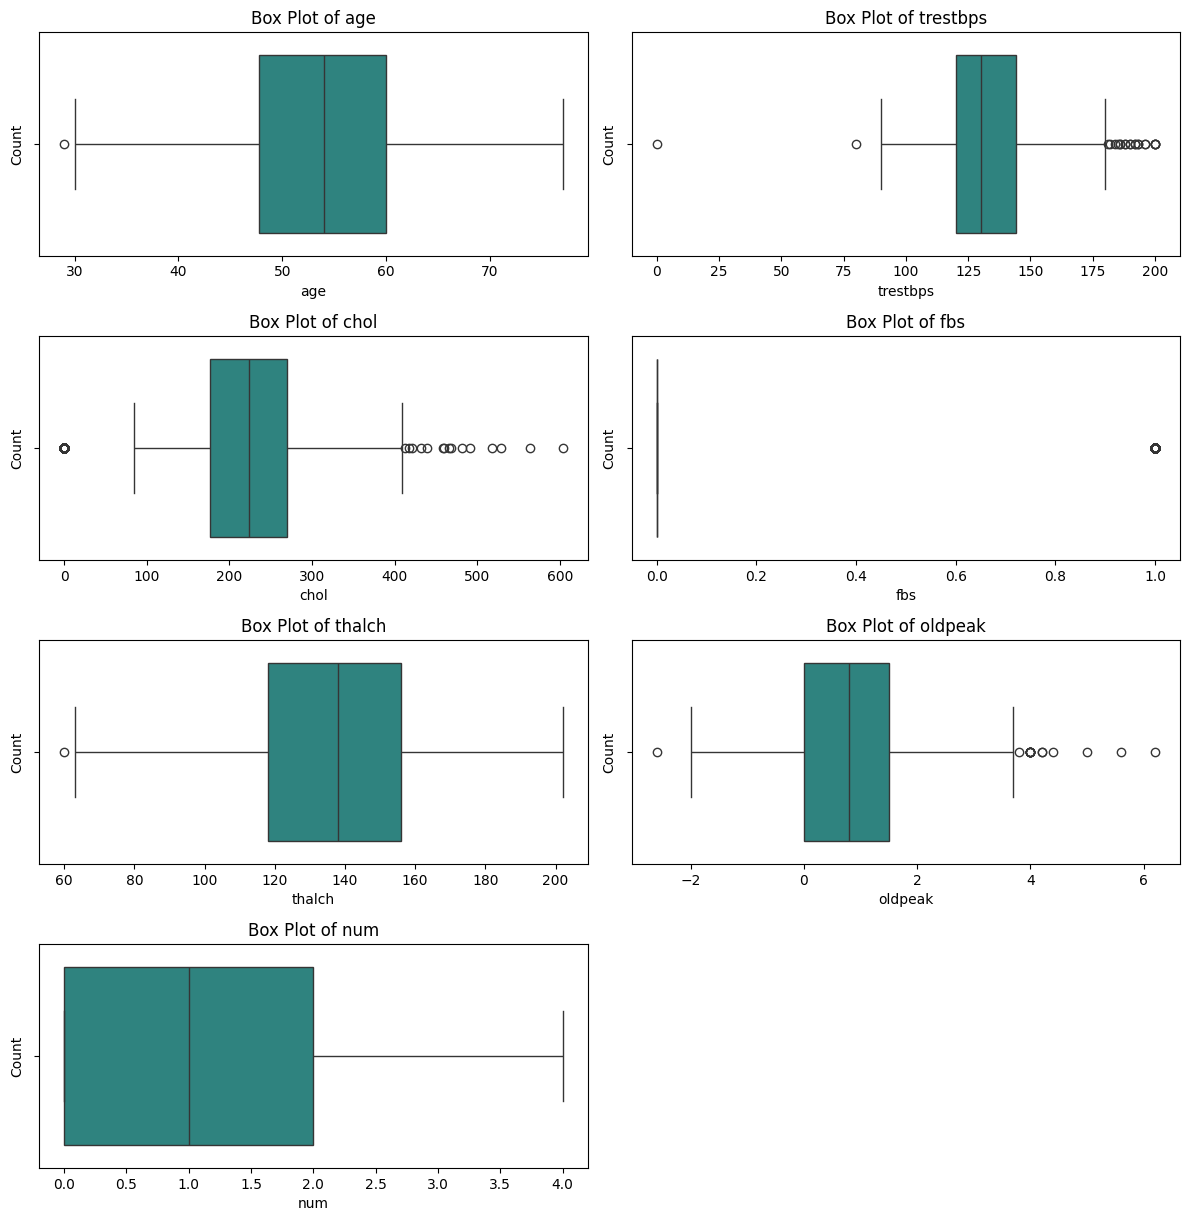

In [27]:
plt.figure(figsize=(12,len(numerical_cols)*3))
for i,fe in enumerate(numerical_cols,1):
    plt.subplot(len(numerical_cols),2,i)
    sn.boxplot(data=data, x=fe, palette='viridis')
    plt.title(f'Box Plot of {fe}')
    plt.xlabel(fe)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [28]:
# Removing outliers

from scipy import stats

def remove_outliers_z_score(data,columns,thresholds=2.5):
    for col in columns:
        z_scores = stats.zscore(data[col])
        data =data[(abs(z_scores) < thresholds)]
    return data
data = remove_outliers_z_score(data,numerical_cols)

In [29]:
data.shape

(830, 13)

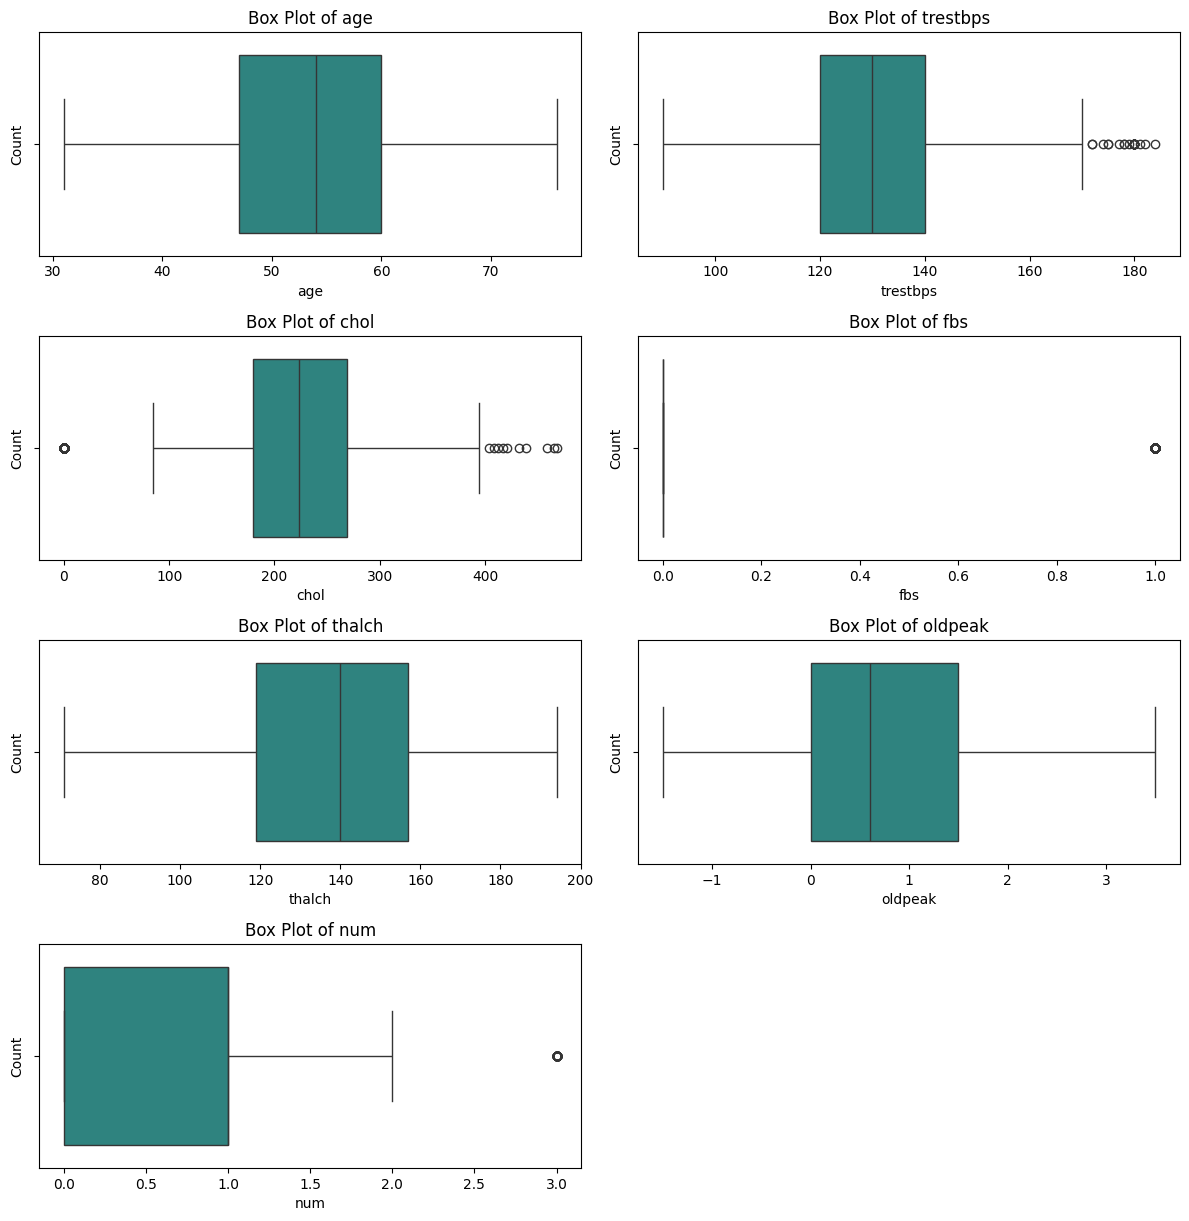

In [32]:
plt.figure(figsize=(12,len(numerical_cols)*3))
for i,fe in enumerate(numerical_cols,1):
    plt.subplot(len(numerical_cols),2,i)
    sn.boxplot(data=data, x=fe, palette='viridis')
    plt.title(f'Box Plot of {fe}')
    plt.xlabel(fe)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [33]:
data.describe()

,age,trestbps,chol,fbs,thalch,oldpeak,num
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.00000
mean,53.491566,132.126506,201.163855,0.200000,137.139759,0.803240,0.86747
std,9.045752,18.205360,107.678428,0.400241,25.822017,0.924263,0.99663
min,31.000000,90.000000,0.000000,0.000000,71.000000,-1.500000,0.00000
25%,47.000000,120.000000,180.000000,0.000000,119.000000,0.000000,0.00000
50%,54.000000,130.000000,223.500000,0.000000,140.000000,0.600000,1.00000
75%,60.000000,140.000000,269.000000,0.000000,157.000000,1.500000,1.00000
max,76.000000,184.000000,468.000000,1.000000,194.000000,3.500000,3.00000


<Axes: >

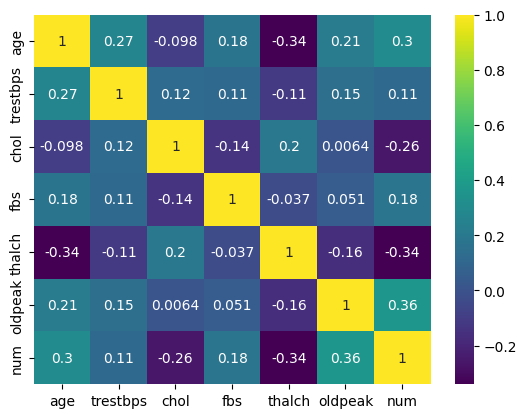

In [34]:
sn.heatmap(data[numerical_cols].corr(),annot=True,cmap='viridis',robust=True)

Feature Engineering

In [35]:
X = data.drop('num',axis=1)
y = data['num']

In [36]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()

In [39]:
for i in categorical_cols:
    X[i] = le.fit_transform(X[i])

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
ss = StandardScaler()

In [42]:
numerical_cols = [fe for fe in X.columns if X[fe].dtype not in ['object','bool']]

In [43]:
X[numerical_cols] = ss.fit_transform(X[numerical_cols])

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

Decision Tree Classification

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtc = DecisionTreeClassifier()

In [48]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
y_pred = dtc.predict(X_test)

In [50]:
y_pred_train = dtc.predict(X_train)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
print(f'Accuracy Score of Train Data: {accuracy_score(y_train,y_pred_train)}')
print(f'Accuracy Score of Test Data: {accuracy_score(y_test,y_pred)}')

Accuracy Score of Train Data: 1.0
Accuracy Score of Test Data: 0.4819277108433735


In [53]:
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_auc_score

In [54]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[53 19  2  5]
 [17 20  9  5]
 [ 3  7  4  4]
 [ 4  6  5  3]]
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        79
           1       0.38      0.39      0.39        51
           2       0.20      0.22      0.21        18
           3       0.18      0.17      0.17        18

    accuracy                           0.48       166
   macro avg       0.36      0.36      0.36       166
weighted avg       0.49      0.48      0.48       166



Hyperparameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV

In [57]:
param_grid={
       'criterion':["gini", "entropy", "log_loss"],
        'splitter':["best", "random"],
        'max_depth':[3,4,5,6,7,9,15,16],
         'min_samples_split':[3,4,5,11,22,12,30,31]
}

In [58]:
grid = GridSearchCV(estimator=dtc,param_grid=param_grid,cv=5,refit=True,verbose=2)

In [59]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV] END criterion=gini, max_depth=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=3, splitter=random; total time=   0

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 9, 15, 16],
                         'min_samples_split': [3, 4, 5, 11, 22, 12, 30, 31],
                         'splitter': ['best', 'random']},
             verbose=2)

In [60]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 4,
 'min_samples_split': 12,
 'splitter': 'random'}

In [61]:
y_pre = grid.predict(X_test)

In [62]:
print(f'Accuracy Score of Test Data: {accuracy_score(y_test,y_pre)}')

Accuracy Score of Test Data: 0.5421686746987951


In [63]:
print(confusion_matrix(y_test,y_pre))
print(classification_report(y_test,y_pre))

[[58 19  1  1]
 [20 29  0  2]
 [ 7 10  1  0]
 [ 3 13  0  2]]
              precision    recall  f1-score   support

           0       0.66      0.73      0.69        79
           1       0.41      0.57      0.48        51
           2       0.50      0.06      0.10        18
           3       0.40      0.11      0.17        18

    accuracy                           0.54       166
   macro avg       0.49      0.37      0.36       166
weighted avg       0.54      0.54      0.51       166



1) What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Common Hyperparameters of Decision Tree Models are:

* Max Depth: This limits how deep the tree can grow.A deeper tree can capture more complex patterns but might overfit the training data.

* Min Samples Split: This sets the minimum number of samples required to split a node.

* Min Samples Leaf: This specifies the minimum number of samples that must be in a leaf node.A higher value can smooth out the model and reduce overfitting.

* Criterion: This determines how the quality of a split is measured, with options like Gini impurity or entropy.

* Max Features: This controls how many features to consider when looking for the best split.

2) What is the difference between the Label encoding and One-hot encoding?

 Label Encoding assigns a unique integer to each category in a variable. For instance, if you have colors like "Red," "Green," and "Blue," they might be encoded as 0, 1, and 2. It’s straightforward but can imply an order that doesn’t exist between categories.

One-Hot Encoding: It creates separate binary columns for each category. Using the same color example, it would create three columns: one for "Red," one for "Green," and one for "Blue," where each row has a 1 in the column corresponding to its color and 0s elsewhere. This method avoids any misleading ordinal relationships but increases the number of features in your dataset.